<a href="https://colab.research.google.com/github/nityawastaken/Synapse_LP/blob/week-4/nitya_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
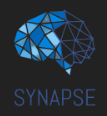

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Synapse LP/week 4/adult_income_dataset.csv')
df
accuracies=[]

## Dealing with Nan values

In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df.info()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15

## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
df.groupby(['relationship','race','sex'])['fnlwgt'].mean()

relationship    race                sex   
Husband         Amer-Indian-Eskimo  Male      128429.715909
                Asian-Pac-Islander  Male      167881.938547
                Black               Male      245598.299517
                Other               Male      214306.794521
                White               Female    175878.000000
                                    Male      184472.109786
Not-in-family   Amer-Indian-Eskimo  Female    135974.677419
                                    Male      137300.390244
                Asian-Pac-Islander  Female    156991.341463
                                    Male      164280.809524
                Black               Female    200958.965714
                                    Male      236442.073107
                Other               Female    159973.041667
                                    Male      206210.852941
                White               Female    183639.470283
                                    Male      195660.056714
Other-relative  Amer-Indian-Eskimo  Female     84421.000000
                                    Male      126705.125000
                Asian-Pac-Islander  Female    167206.848485
                                    Male      183762.485714
                Black               Female    224552.280000
                                    Male      244366.521127
                Other               Female    196595.909091
                                    Male      205601.500000
                White               Female    190676.886364
                                    Male      214298.250667
Own-child       Amer-Indian-Eskimo  Female    105399.000000
                                    Male      115918.538462
                Asian-Pac-Islander  Female    135626.863636
                                    Male      144334.658228
                Black               Female    214412.117391
                                    Male      253691.326772
                Other               Female    169077.411765
                                    Male      204950.250000
                White               Female    184973.616186
                                    Male      195986.770384
Unmarried       Amer-Indian-Eskimo  Female     91100.769231
                                    Male      132778.187500
                Asian-Pac-Islander  Female    156921.859649
                                    Male      148915.958333
                Black               Female    218672.181669
                                    Male      240767.393258
                Other               Female    183787.125000
                                    Male      227875.636364
                White               Female    182908.556582
                                    Male      190262.004926
Wife            Amer-Indian-Eskimo  Female    142494.117647
                Asian-Pac-Islander  Female    135010.910714
                Black               Female    211731.406015
                Other               Female    130568.272727
                White               Female    181171.786195
                                    Male      350162.000000
Name: fnlwgt, dtype: float64

## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df.drop(columns=['education-num'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
pd.crosstab(df['marital-status'],df['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,2268,103,308,1535,0
Married-AF-spouse,9,0,1,1,0,10
Married-civ-spouse,12454,14,118,83,0,1396
Married-spouse-absent,0,181,26,43,120,0
Never-married,0,4448,548,3929,801,0
Separated,0,383,53,90,413,0
Widowed,0,432,40,12,343,0


## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [ ]:
#Write your code here
onehotcols=[]
labelcols=[]
for i in ['marital-status','workclass','education','occupation','relationship','race','sex','native-country']:
  if len(df[i].unique())<10 :
    onehotcols+=[i]
  else:
    labelcols+=[i]
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

df_encoded=pd.get_dummies(df,columns=onehotcols,dtype=int)
lbenc=LabelEncoder()
for i in labelcols:
  df_encoded[i]=lbenc.fit_transform(df_encoded[i])
df_encoded


,age,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status_Divorced,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,77516,9,0,2174,0,40,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,9,3,0,0,13,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,11,5,0,0,40,38,<=50K,1,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,1,5,0,0,40,38,<=50K,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,9,9,0,0,40,4,<=50K,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,12,0,0,38,38,<=50K,0,...,0,0,1,0,0,0,0,1,1,0
32557,40,154374,11,6,0,0,40,38,>50K,0,...,0,0,0,0,0,0,0,1,0,1
32558,58,151910,11,0,0,0,40,38,<=50K,0,...,0,1,0,0,0,0,0,1,1,0
32559,22,201490,11,0,0,0,20,38,<=50K,0,...,1,0,0,0,0,0,0,1,0,1


## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df_encoded['income'] = df_encoded['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df_encoded

,age,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status_Divorced,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,77516,9,0,2174,0,40,38,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,9,3,0,0,13,38,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,11,5,0,0,40,38,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,1,5,0,0,40,38,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,9,9,0,0,40,4,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,12,0,0,38,38,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,40,154374,11,6,0,0,40,38,1,0,...,0,0,0,0,0,0,0,1,0,1
32558,58,151910,11,0,0,0,40,38,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,22,201490,11,0,0,0,20,38,0,0,...,1,0,0,0,0,0,0,1,0,1


<Axes: >

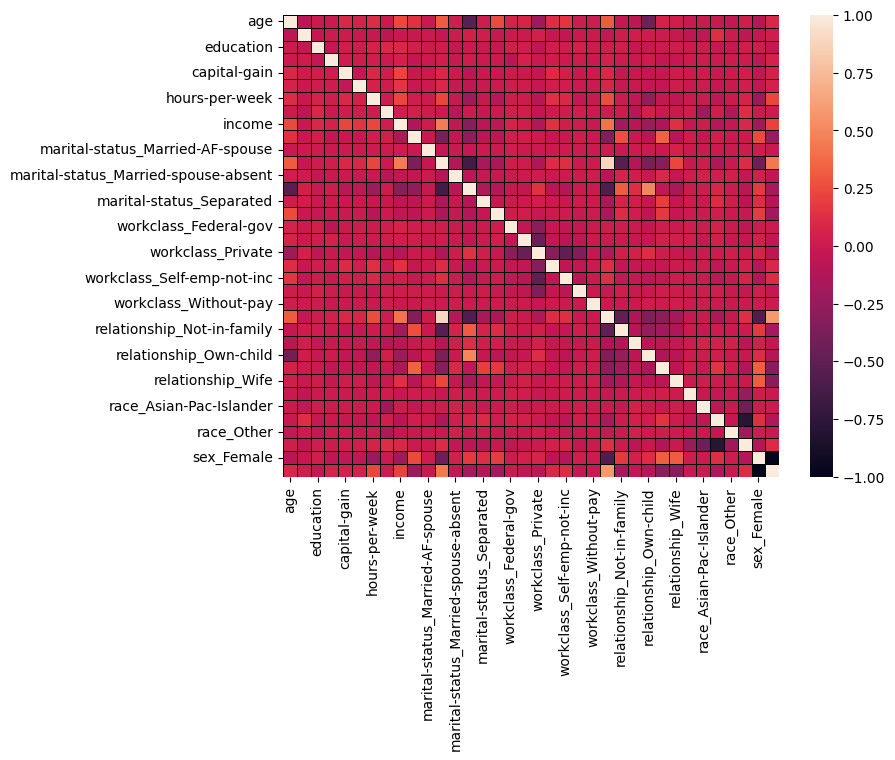

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(),linecolor='Black',linewidths=0.5)

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
X = df_encoded.drop(columns=['income'])
y = df_encoded['income']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

Logistic Regression predicts the probability of an input belonging to a certain class (e.g., 0 or 1). It uses a sigmoid function and a decision boundary to classify inputs.

Use cases: spam detection, medical diagnosis, image recognition.

In [ ]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Find the accuracy and confusion matrix for the same and explain what it shows.

In [ ]:
y_pred = lr_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)

print(f"Model Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.79
Confusion Matrix:
[[6472  359]
 [1575  643]]


# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

<b>Print the Model Accuracy</b>

In [ ]:
y_pred = dt_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy
accuracies.append(accuracy)


## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:Logistic Regression:
 - It's a linear model that estimates the probability of a categorical dependent variable.
 - It works by fitting a sigmoid function to the data, which maps input features to a probability between 0 and 1.
 - Use Cases: Predicting customer churn, credit risk assessment, medical diagnosis.

 Naive Bayes:
 - It's a probabilistic classifier based on Bayes' theorem.
 - It assumes that features are conditionally independent, which simplifies calculations.
 - Use Cases: Spam detection, sentiment analysis, text classification.

 Decision Tree:
 - It's a tree-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome.
 - It works by recursively partitioning the data based on feature values to create a tree that maximizes information gain or minimizes impurity.
 - Use Cases: Fraud detection, customer segmentation, medical diagnosis.

 The accuracies can differ due to:
 - The nature of the data: Some models might be better suited for specific types of data (linearly separable, non-linear, etc.).
 - The complexity of the model: Decision trees can be prone to overfitting if not tuned properly, while Naive Bayes can make strong assumptions about feature independence.
 - The chosen hyperparameters: Different models have different parameters that can affect their performance.



### Mention some real life use cases for each of these three models:

Ans:Logistic Regression:
 - Predicting customer churn in a telecommunications company
 - Assessing the risk of loan default for a bank
 - Diagnosing diseases based on patient symptoms

 Naive Bayes:
 - Filtering spam emails
 - Classifying news articles by topic
 - Detecting sentiment in social media posts

 Decision Tree:
 - Identifying fraudulent credit card transactions
 - Segmenting customers based on their purchasing behavior
 - Diagnosing medical conditions based on patient data


Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

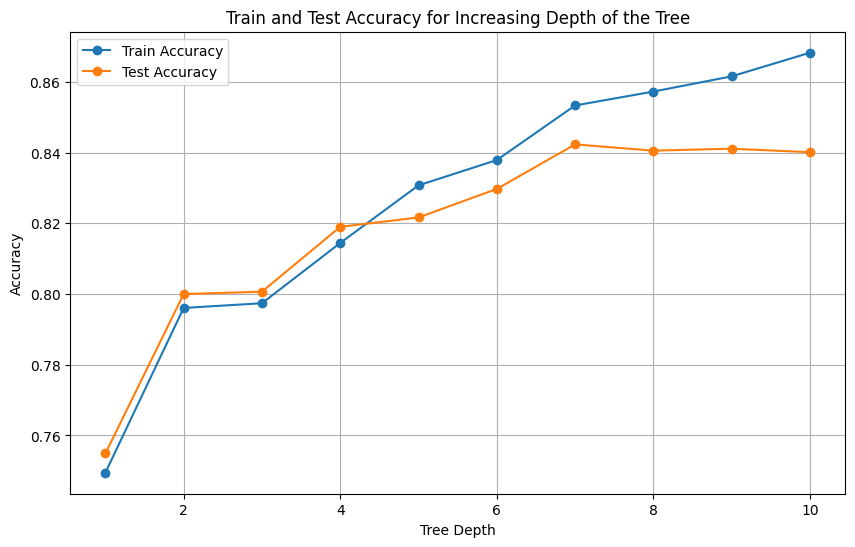

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracies = []
test_accuracies = []


depth_range = range(1, 11)
for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depth_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Increasing Depth of the Tree')
plt.legend()
plt.grid()
plt.show()

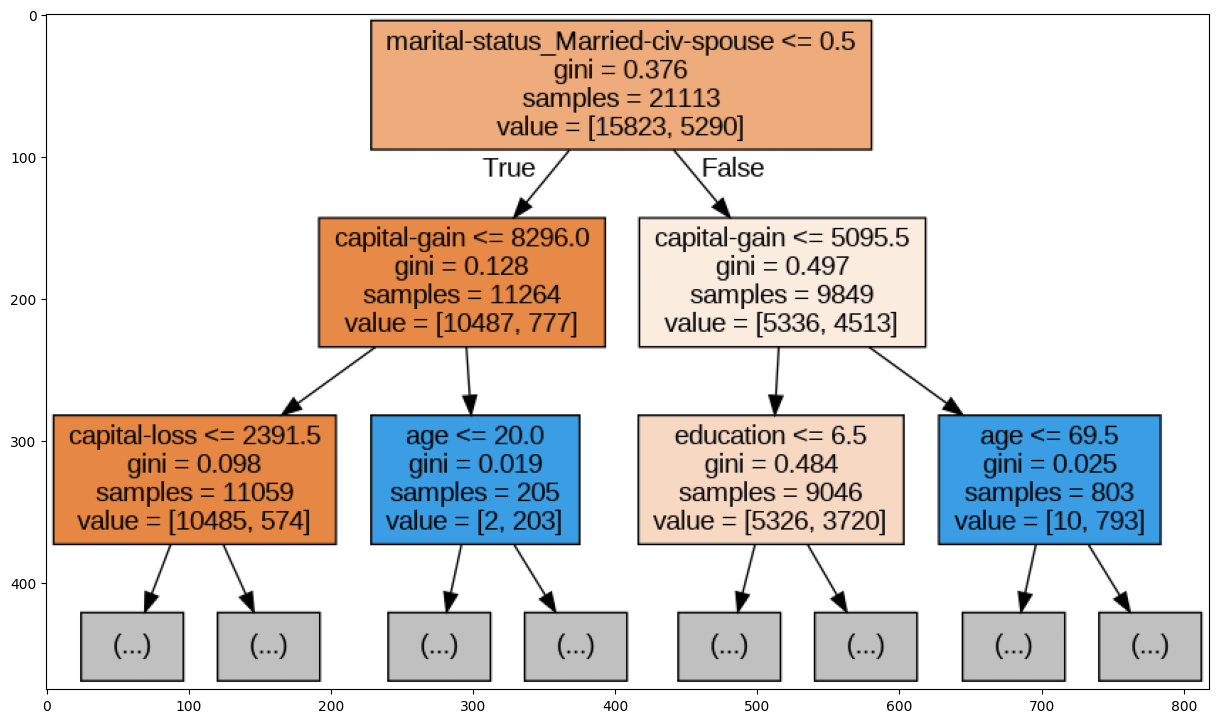

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here

print(f"Train Accuracy: {accuracy_score(y_train, dt_model.predict(X_train))}")

y_pred=dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)

print(f"Test Accuracy: {accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.8020775776328876


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:
here we only changed the max_depth parameter.
it is used to set the max depth of the tree.
Increasing this value allows the model to learn more complex relationships but also makes it more prone to overfitting.
The graph shows the train and test accuracy for different values of max_depth, showing that increasing depth increases training accuracy but after a certain point, test accuracy starts to decrease, which is a sign of overfitting.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_clf.classes_)
# disp.plot()
# plt.show()

RandomForestClassifier(random_state=42)

In [ ]:
#find the accuracy
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.85


### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

*Ans*:A decision tree builds a single tree-like model to make predictions, while a random forest builds multiple decision trees and combines their predictions to make a final prediction.

Random forests are less prone to overfitting and generally more accurate than decision trees.

In [ ]:

#write a code to implement BaggingClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
round(accuracy,4)

0.8444

### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans:Bagging (Bootstrap Aggregating) is an ensemble method that creates multiple subsets of the original dataset by sampling with replacement. It then trains a model on each subset and combines their predictions.

Random forest is a type of bagging algorithm that uses decision trees as base models and introduces further randomness by selecting a random subset of features at each node of the tree.

Bagging is used to reduce variance and improve the stability and accuracy of models. It helps to prevent overfitting, especially with complex models like decision trees.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:

#write code here

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
round(accuracy,4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8534

Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
#xgboost 2.1.1 is alr installed so
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
round(accuracy,4)

0.8652

### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans:Adaboost sequentially trains weak learners, where each subsequent learner focuses on correcting errors made by previous learners. It combines the learners by weighting them according to their performance.

XGBoost uses gradient boosting, which optimizes a differentiable loss function by iteratively adding models to the ensemble. It also incorporates regularization to prevent overfitting.

XGBoost is generally preferred over Adaboost due to its scalability, handling of missing values, regularization, and better performance in many cases. It excels in situations with large datasets, high dimensionality, and complex relationships.

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:Bagging: Trains models in parallel on different subsets of the data and averages their predictions. For example, a random forest is a bagging algorithm where multiple decision trees are trained on different bootstrap samples of the data.
Boosting: Trains models sequentially, where each subsequent model focuses on correcting errors made by previous models. The final prediction is a weighted combination of all models.

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:

#implement pruning

from sklearn.model_selection import GridSearchCV

params = {'ccp_alpha': [0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid_search.fit(X_train, y_train)

best_ccp_alpha = grid_search.best_params_['ccp_alpha']

pruned_dt = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=42)
pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

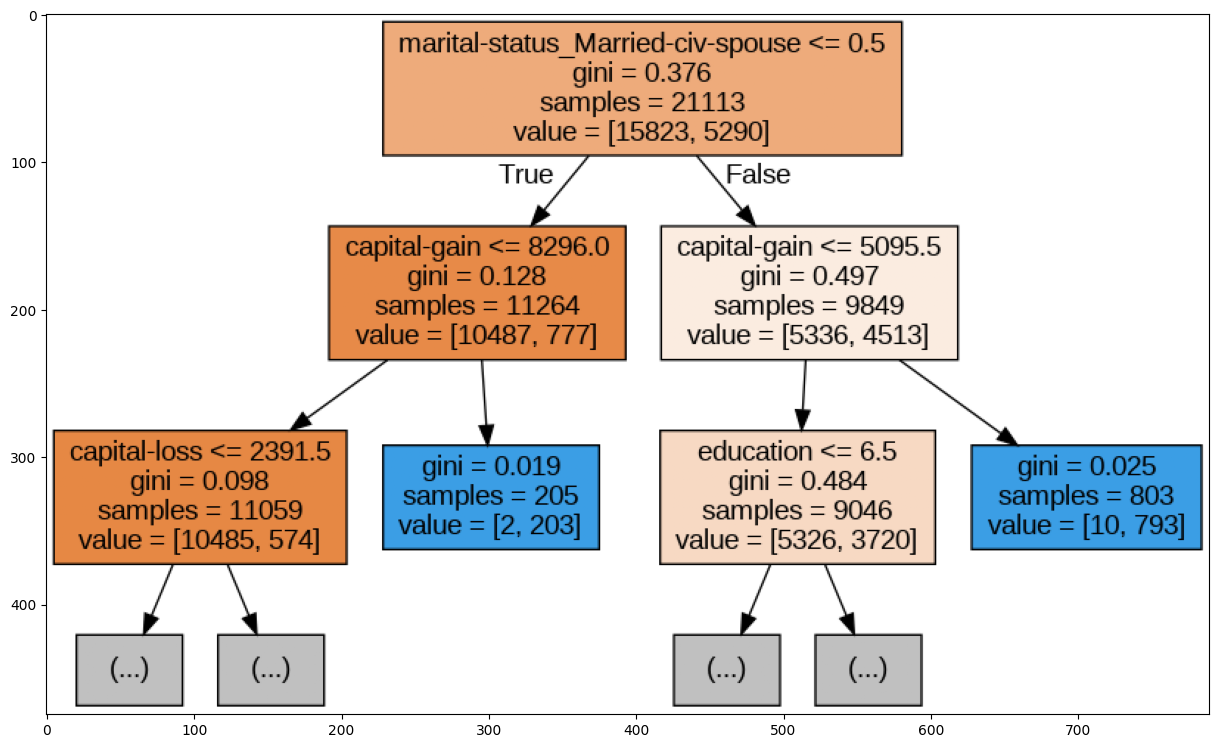

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique

from sklearn import tree
import matplotlib.pyplot as plt

decision_tree = tree.export_graphviz(pruned_dt, out_file='pruned_tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)

!dot -Tpng pruned_tree.dot -o pruned_tree.png
image = plt.imread('pruned_tree.png')

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

In [ ]:
#write your code here

y_pred = pruned_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
round(accuracy,4)

0.8426

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

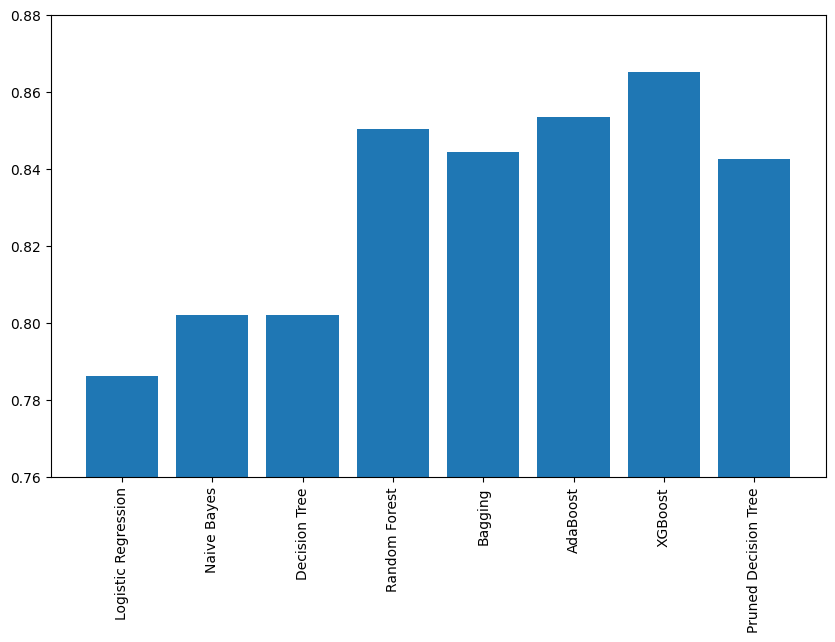

In [ ]:
#write your code here


models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'XGBoost', 'Pruned Decision Tree']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)

plt.xticks(rotation=90)
plt.ylim(0.76, 0.88)

plt.show()

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025